In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df.dtypes

Gender                         object
Customer Type                  object
Type of Travel                 object
Class                          object
satisfaction                   object
Age                             int64
Flight Distance                 int64
Inflight entertainment          int64
Baggage handling                int64
Cleanliness                     int64
Departure Delay in Minutes      int64
Arrival Delay in Minutes      float64
dtype: object

In [4]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [5]:
df['Gender'] = df['Gender'].map({'Female':0,"Male":1})

In [6]:
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})

In [7]:
df['Type of Travel'] = df['Type of Travel'].map({'Business travel':1,'Personal Travel':0})

In [8]:
df['Class'] = df['Class'].map({'Business':0,'Eco':1,'Eco Plus':2})

In [9]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
a = list(df['Customer Type'].value_counts().keys())
b = list(df['Customer Type'].value_counts().values)


<BarContainer object of 2 artists>

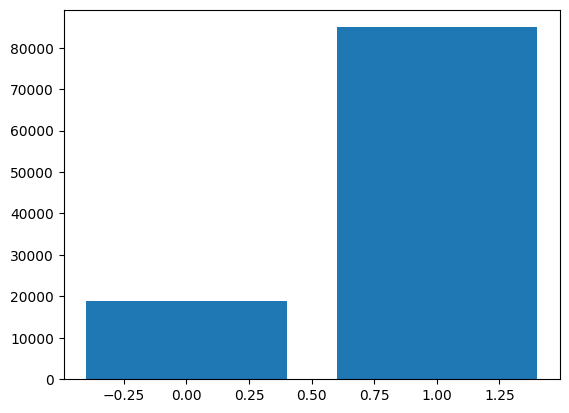

In [12]:
plt.bar(a,b)

In [13]:
df['Customer Type'].value_counts()

Customer Type
1    84923
0    18981
Name: count, dtype: int64

In [14]:
loyar_customer = df[df['Customer Type']==1].iloc[0:20000]

In [15]:
loyar_customer.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,2,0,13,460,5,4,5,25,18.0
2,0,1,1,0,1,26,1142,5,4,5,0,0.0
3,0,1,1,0,0,25,562,2,3,2,11,9.0
4,1,1,1,0,1,61,214,3,4,3,0,0.0
5,0,1,0,1,0,26,1180,1,4,1,0,0.0


In [16]:
disloyal = df[df['Customer Type']==0]
disloyal.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
1,1,0,1,0,0,25,235,1,3,1,1,6.0
9,1,0,1,1,0,20,1061,2,4,2,0,0.0
10,0,0,1,1,0,24,1182,2,5,2,0,0.0
15,1,0,1,1,0,13,486,4,4,4,1,0.0
24,0,0,1,1,1,23,452,1,5,1,54,44.0


In [17]:
complete_df = pd.concat([disloyal,loyar_customer])
complete_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
1,1,0,1,0,0,25,235,1,3,1,1,6.0
9,1,0,1,1,0,20,1061,2,4,2,0,0.0
10,0,0,1,1,0,24,1182,2,5,2,0,0.0
15,1,0,1,1,0,13,486,4,4,4,1,0.0
24,0,0,1,1,1,23,452,1,5,1,54,44.0


In [18]:
colum = list(complete_df['Customer Type'].value_counts().keys())
valu = list(complete_df['Customer Type'].value_counts().values)


<BarContainer object of 2 artists>

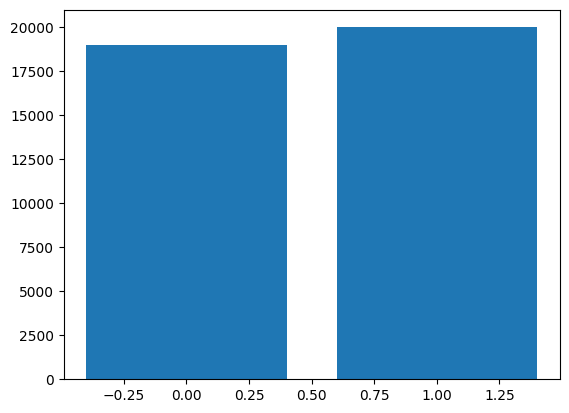

In [19]:
plt.bar(colum,valu)

In [20]:
complete_df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      103
dtype: int64

In [21]:
complete_df.dropna(inplace=True)

In [22]:
complete_df.isnull().sum()


Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [23]:
complete_df.shape

(38878, 12)

In [24]:
x = complete_df.drop('Customer Type',axis=1)
y = complete_df[['Customer Type']]

In [25]:
x.shape  , y.shape

((38878, 11), (38878, 1))

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lg = LogisticRegression()

In [31]:
lg.fit(x_train,y_train)

c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
lg.score(x_train,y_train)
## accuracy on training data

0.8624525753970805

In [35]:

lg.score(x_test,y_test)
# accuracy on test data

0.864454732510288

In [33]:
pred = lg.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,pred)

array([[3364,  411],
       [ 643, 3358]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3775
           1       0.89      0.84      0.86      4001

    accuracy                           0.86      7776
   macro avg       0.87      0.87      0.86      7776
weighted avg       0.87      0.86      0.86      7776



In [44]:
round((3364 + 3358 )/(3364+411+643+3358)*100)

86

In [51]:
y_test['prediction'] = pred

In [54]:
y_test.iloc[0:50]

,Customer Type,prediction
6270,1,1
96394,0,0
18836,1,1
71171,0,1
11304,1,1
4684,1,1
35290,0,0
13936,1,1
102866,0,0
10669,0,0


In [55]:
lg.score(x_train,y_train)

0.8624525753970805

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt  = DecisionTreeClassifier()

In [61]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
pred2 = dt.predict(x_test)

In [66]:
dt.score(x_test,y_test)

0.8886316872427984

In [64]:
y_test = y_test.drop('prediction',axis=1)
y_test

,Customer Type
6270,1
96394,0
18836,1
71171,0
11304,1
...,...
46402,0
7028,1
90518,0
23059,0
